## 前処理

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        "A": [1, np.nan, 3, 4, 5],
        "B": [6, 7, 8, np.nan, 10],
        "C": [11, 12, 13, 14, 15]
    }
)

df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [2]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [10]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="mean")

imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [13]:
import pandas as pd
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": ["a", "b", "a", "b", "c"]
    }
)

df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df["B"])
le.transform(df["B"])

array([0, 1, 0, 1, 2])

In [15]:
#元のデータを確認
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

df_ohe = df.copy()

le = LabelEncoder()

df_ohe["B"] = le.fit_transform(df_ohe["B"])

ct = ColumnTransformer([("test", OneHotEncoder(),
                            [1])], remainder="passthrough")

ct.fit_transform(df_ohe)

array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

In [24]:
import pandas as pd

df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": [100, 200, 300, 400, 500]
    }
)

df

,A,B
0,1,100
1,2,200
2,3,300
3,4,400
4,5,500


In [25]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [26]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

mmsc.fit(df)
mmsc.transform(df)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

## 分類


In [27]:
from sklearn.datasets import load_iris

irsi = load_iris()
X, y = irsi["data"], irsi["target"]

print("X:")
print(X[:5, :])
print("y:")
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


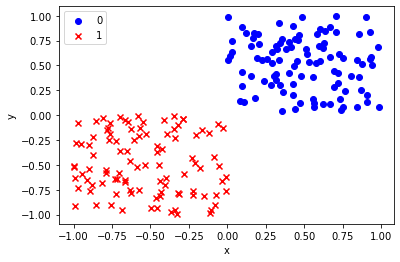

In [33]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

X0 = np.random.uniform(0, 1, size=(100, 2))
y0 = np.repeat(0, 100)

X1 = np.random.uniform(-1, 0, size=(100, 2))
y1 = np.repeat(1, 100)

fig,ax = plt.subplots()

ax.scatter(X0[:, 0], X0[:, 1], marker="o", c="blue", label="0")
ax.scatter(X1[:, 0], X1[:, 1], marker="x", c="red", label="1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [44]:
from sklearn.svm import SVC

def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))

    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker="o", c="blue", label="0")
    ax.scatter(X1[:, 0], X1[:, 1], marker="x", c="red", label="1")

    # 決定境界とマージン
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                        np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape(xx.shape)
    ax.scatter(xx, yy, p,
                color="k", label=[-1, 0, 1],
                alpha=0.5, linestyles=["--", "-", "--"])

    #SVMのプロット
    ax.scatter(svc.support_vectors_[:, 0],
                svc.support_vectors_[:, 1],
                s=250, facecolors="none",
                edgecolors="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.show()

/opt/anaconda3/envs/qualification_for_python/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


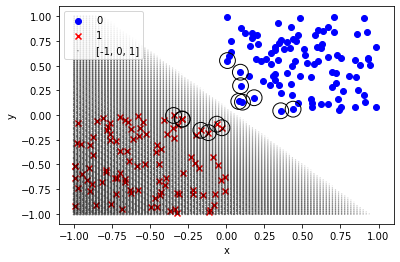

In [45]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=1)

/opt/anaconda3/envs/qualification_for_python/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


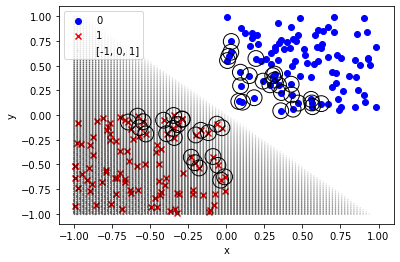

In [47]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=0.1)

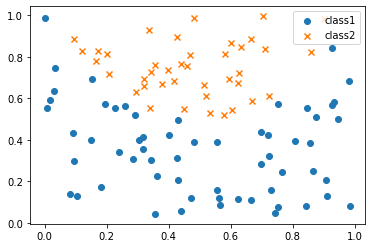

In [55]:
np.random.seed(123)
X = np.random.random(size=(100, 2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 + 0.5).astype(int)

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1], marker="o", label="class1")
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker="x", label="class2")

ax.legend()
plt.show()

/opt/anaconda3/envs/qualification_for_python/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


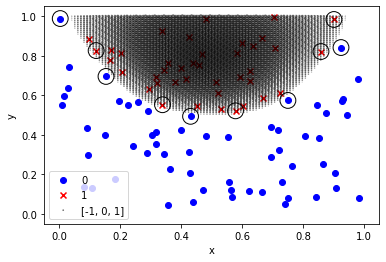

In [59]:
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="rbf", C=1e3, xmin=0, ymin=0)